In [3]:
# Import our parser modules
from mcnpy.endf.read_endf import read_endf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Define the path to our test file
endf_filepath = '/home/MONLEON-JUAN/MCNPy/mcnpy/endf/files/n-026_Fe_056.endf'
endf_filepath = '/soft_snc/lib/endf/jeff32/neutrons/260560_32.endf'

pierre_endf = '/soft_snc/lib/endf/jeff40/neutrons/13-Al-26g.txt'

In [4]:
# Read only MF4 sections
endf = read_endf(pierre_endf)

/home/MONLEON-JUAN/MCNPy/mcnpy/endf/parsers/parse_endf.py:90: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 8, 10, 12, 14, 32, 33, 40]. Only parsing: [1, 4, 34]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")


In [5]:
mf34 = endf.mf[34]

In [6]:
ang_cov = mf34.to_ang_covmat()

In [9]:
# Check the debug output and current covmat state
print("Angular covmat summary:")
summary_df = ang_cov.summary()
print(summary_df.head())

print("\nChecking metadata fields:")
print(f"Unique value_form values: {summary_df['value_form'].unique()}")
print(f"Unique frame values: {summary_df['frame'].unique()}")
print(f"Unique covariance_model values: {summary_df['covariance_model'].unique()}")
print(f"Unique ltt_representation values: {summary_df['ltt_representation'].unique()}")

Angular covmat summary:
   isotope_row  reaction_row  L_row  isotope_col  reaction_col  L_col  NE   M  \
0        13026             2      1        13026             2      1  14  13   
1        13026             2      1        13026             2      2  14  13   
2        13026             2      1        13026             2      3  14  13   
3        13026             2      1        13026             2      4  14  13   
4        13026             2      1        13026             2      5  14  13   

  value_form  needs_relative_conversion    frame covariance_model  \
0   relative                      False  unknown          unknown   
1   relative                      False  unknown          unknown   
2   relative                      False  unknown          unknown   
3   relative                      False  unknown          unknown   
4   relative                      False  unknown          unknown   

  encountered_lbs                               interpolation  \
0        

In [10]:
# Let's check if we can see any debug output in the logs
import logging

# Set up console handler to see debug output
logging.basicConfig(level=logging.DEBUG, force=True)
logger = logging.getLogger(__name__)

# Re-process the MF34 to trigger debug output
print("Re-processing MF34 with debug enabled...")
ang_cov2 = mf34.to_ang_covmat()

print(f"\nNew processing complete. Number of matrices: {len(ang_cov2.matrices)}")
summary_df2 = ang_cov2.summary()
print(f"Unique encountered_lbs values: {summary_df2['encountered_lbs'].unique()}")

DEBUG:mcnpy.endf.classes.mf34.mf34:Starting to_ang_covmat for MF34 MT=2
DEBUG:mcnpy.endf.classes.mf34.mf34:Found 1 subsections (MT1).
DEBUG:mcnpy.endf.classes.mf34.mf34:Processing subsection 1/1: MT1=2
DEBUG:mcnpy.endf.classes.mf34.mf34:Found 21 sub-subsections (L,L1).
DEBUG:mcnpy.endf.classes.mf34.mf34:Processing sub-subsection 1/21: L=1, L1=1, NI=1
DEBUG:mcnpy.endf.classes.mf34.mf34:This is a VARIANCE matrix (L=L1=1) - diagonal should be non-negative
DEBUG:mcnpy.endf.classes.mf34.mf34:Found 1 LIST records. Determining union grid...
DEBUG:mcnpy.endf.classes.mf34.mf34:Added LB=5 to encountered_lbs. Current set: {5}
DEBUG:mcnpy.endf.classes.mf34.mf34:Decoding LB=5 LS=1...
DEBUG:mcnpy.endf.classes.mf34.mf34:Native grid NE=14, Matrix size M=13x13, Raw values count=91
DEBUG:mcnpy.endf.classes.mf34.mf34:Matrix fill time: 0.0000s
DEBUG:mcnpy.endf.classes.mf34.mf34:Finished decoding LB=5.
DEBUG:mcnpy.endf.classes.mf34.mf34:Decoded component 1 (LB=5), Native NE=14
DEBUG:mcnpy.endf.classes.mf34

Re-processing MF34 with debug enabled...


DEBUG:mcnpy.endf.classes.mf34.mf34:Union grid NE=14, Final matrix size M=13x13
DEBUG:mcnpy.endf.classes.mf34.mf34:Projecting and summing 1 components...
DEBUG:mcnpy.endf.classes.mf34.mf34:Projecting component 1 (#1/1)...
DEBUG:mcnpy.endf.classes.mf34.mf34:Projecting matrix...
DEBUG:mcnpy.endf.classes.mf34.mf34:Native and Union grids are identical. Skipping projection calculation.
DEBUG:mcnpy.endf.classes.mf34.mf34:Projection time (skipped): 0.0010s
DEBUG:mcnpy.endf.classes.mf34.mf34:Projected component 1 has negative covariance diagonals (EXPECTED for L≠L1)
DEBUG:mcnpy.endf.classes.mf34.mf34:Negative diagonal count: 5
DEBUG:mcnpy.endf.classes.mf34.mf34:Diagonal range: [-4.20e-01, 4.62e-03]
DEBUG:mcnpy.endf.classes.mf34.mf34:Total matrix diagonal after adding component 1:
DEBUG:mcnpy.endf.classes.mf34.mf34:Before: min=0.00e+00, max=0.00e+00
DEBUG:mcnpy.endf.classes.mf34.mf34:After:  min=-4.20e-01, max=4.62e-03
DEBUG:mcnpy.endf.classes.mf34.mf34:Total covariance matrix has 5 negative dia


New processing complete. Number of matrices: 21
Unique encountered_lbs values: ['']


In [11]:
# Test with the new debug output
print("Running with final encountered_lbs debug...")
ang_cov3 = mf34.to_ang_covmat()

print(f"\nProcessing complete. Number of matrices: {len(ang_cov3.matrices)}")
summary_df3 = ang_cov3.summary()
print(f"Unique encountered_lbs values: {summary_df3['encountered_lbs'].unique()}")
print(f"First few encountered_lbs values: {summary_df3['encountered_lbs'].head(3).tolist()}")

DEBUG:mcnpy.endf.classes.mf34.mf34:Starting to_ang_covmat for MF34 MT=2
DEBUG:mcnpy.endf.classes.mf34.mf34:Found 1 subsections (MT1).
DEBUG:mcnpy.endf.classes.mf34.mf34:Processing subsection 1/1: MT1=2
DEBUG:mcnpy.endf.classes.mf34.mf34:Found 21 sub-subsections (L,L1).
DEBUG:mcnpy.endf.classes.mf34.mf34:Processing sub-subsection 1/21: L=1, L1=1, NI=1
DEBUG:mcnpy.endf.classes.mf34.mf34:This is a VARIANCE matrix (L=L1=1) - diagonal should be non-negative
DEBUG:mcnpy.endf.classes.mf34.mf34:Found 1 LIST records. Determining union grid...
DEBUG:mcnpy.endf.classes.mf34.mf34:Added LB=5 to encountered_lbs. Current set: {5}
DEBUG:mcnpy.endf.classes.mf34.mf34:Decoding LB=5 LS=1...
DEBUG:mcnpy.endf.classes.mf34.mf34:Native grid NE=14, Matrix size M=13x13, Raw values count=91
DEBUG:mcnpy.endf.classes.mf34.mf34:Matrix fill time: 0.0000s
DEBUG:mcnpy.endf.classes.mf34.mf34:Finished decoding LB=5.
DEBUG:mcnpy.endf.classes.mf34.mf34:Decoded component 1 (LB=5), Native NE=14
DEBUG:mcnpy.endf.classes.mf34

Running with final encountered_lbs debug...


DEBUG:mcnpy.endf.classes.mf34.mf34:Matrix fill time: 0.0001s
DEBUG:mcnpy.endf.classes.mf34.mf34:Finished decoding LB=5.
DEBUG:mcnpy.endf.classes.mf34.mf34:Decoded component 1 (LB=5), Native NE=14
DEBUG:mcnpy.endf.classes.mf34.mf34:Component 1 covariance diagonal - min: 0.00e+00, max: 0.00e+00
DEBUG:mcnpy.endf.classes.mf34.mf34:Grid determination and decoding time: 0.0085s
DEBUG:mcnpy.endf.classes.mf34.mf34:Union grid NE=14, Final matrix size M=13x13
DEBUG:mcnpy.endf.classes.mf34.mf34:Projecting and summing 1 components...
DEBUG:mcnpy.endf.classes.mf34.mf34:Projecting component 1 (#1/1)...
DEBUG:mcnpy.endf.classes.mf34.mf34:Projecting matrix...
DEBUG:mcnpy.endf.classes.mf34.mf34:Native and Union grids are identical. Skipping projection calculation.
DEBUG:mcnpy.endf.classes.mf34.mf34:Projection time (skipped): 0.0004s
DEBUG:mcnpy.endf.classes.mf34.mf34:Projected component 1 covariance diagonal - min: 0.00e+00, max: 0.00e+00
DEBUG:mcnpy.endf.classes.mf34.mf34:Total matrix diagonal after a


Processing complete. Number of matrices: 21
Unique encountered_lbs values: ['']
First few encountered_lbs values: ['', '', '']


In [12]:
# Test with the scope fix - encountered_lbs should now persist across sub-subsections
print("Testing with encountered_lbs scope fix...")
ang_cov4 = mf34.to_ang_covmat()

print(f"\nProcessing complete. Number of matrices: {len(ang_cov4.matrices)}")
summary_df4 = ang_cov4.summary()
print(f"Unique encountered_lbs values: {summary_df4['encountered_lbs'].unique()}")
print(f"First few encountered_lbs values:")
for i, val in enumerate(summary_df4['encountered_lbs'].head(5)):
    print(f"  {i}: '{val}'")

print(f"\nUnique metadata values after fix:")
print(f"  value_form: {summary_df4['value_form'].unique()}")
print(f"  frame: {summary_df4['frame'].unique()}")
print(f"  covariance_model: {summary_df4['covariance_model'].unique()}")
print(f"  ltt_representation: {summary_df4['ltt_representation'].unique()}")

DEBUG:mcnpy.endf.classes.mf34.mf34:Starting to_ang_covmat for MF34 MT=2
DEBUG:mcnpy.endf.classes.mf34.mf34:Found 1 subsections (MT1).
DEBUG:mcnpy.endf.classes.mf34.mf34:Processing subsection 1/1: MT1=2
DEBUG:mcnpy.endf.classes.mf34.mf34:Found 21 sub-subsections (L,L1).
DEBUG:mcnpy.endf.classes.mf34.mf34:Processing sub-subsection 1/21: L=1, L1=1, NI=1
DEBUG:mcnpy.endf.classes.mf34.mf34:This is a VARIANCE matrix (L=L1=1) - diagonal should be non-negative
DEBUG:mcnpy.endf.classes.mf34.mf34:Found 1 LIST records. Determining union grid...
DEBUG:mcnpy.endf.classes.mf34.mf34:Added LB=5 to encountered_lbs. Current set: {5}
DEBUG:mcnpy.endf.classes.mf34.mf34:Decoding LB=5 LS=1...
DEBUG:mcnpy.endf.classes.mf34.mf34:Native grid NE=14, Matrix size M=13x13, Raw values count=91
DEBUG:mcnpy.endf.classes.mf34.mf34:Matrix fill time: 0.0000s
DEBUG:mcnpy.endf.classes.mf34.mf34:Finished decoding LB=5.
DEBUG:mcnpy.endf.classes.mf34.mf34:Decoded component 1 (LB=5), Native NE=14
DEBUG:mcnpy.endf.classes.mf34

Testing with encountered_lbs scope fix...


DEBUG:mcnpy.endf.classes.mf34.mf34:Decoding LB=5 LS=1...
DEBUG:mcnpy.endf.classes.mf34.mf34:Native grid NE=14, Matrix size M=13x13, Raw values count=91
DEBUG:mcnpy.endf.classes.mf34.mf34:Matrix fill time: 0.0001s
DEBUG:mcnpy.endf.classes.mf34.mf34:Finished decoding LB=5.
DEBUG:mcnpy.endf.classes.mf34.mf34:Decoded component 1 (LB=5), Native NE=14
DEBUG:mcnpy.endf.classes.mf34.mf34:Component 1 covariance diagonal - min: 0.00e+00, max: 0.00e+00
DEBUG:mcnpy.endf.classes.mf34.mf34:Grid determination and decoding time: 0.0063s
DEBUG:mcnpy.endf.classes.mf34.mf34:Union grid NE=14, Final matrix size M=13x13
DEBUG:mcnpy.endf.classes.mf34.mf34:Projecting and summing 1 components...
DEBUG:mcnpy.endf.classes.mf34.mf34:Projecting component 1 (#1/1)...
DEBUG:mcnpy.endf.classes.mf34.mf34:Projecting matrix...
DEBUG:mcnpy.endf.classes.mf34.mf34:Native and Union grids are identical. Skipping projection calculation.
DEBUG:mcnpy.endf.classes.mf34.mf34:Projection time (skipped): 0.0005s
DEBUG:mcnpy.endf.cla


Processing complete. Number of matrices: 21
Unique encountered_lbs values: ['']
First few encountered_lbs values:
  0: ''
  1: ''
  2: ''
  3: ''
  4: ''

Unique metadata values after fix:
  value_form: ['relative']
  frame: ['unknown']
  covariance_model: ['unknown']
  ltt_representation: ['unknown']


In [6]:
ang_cov

                  MF34 Angular Distribution Covariance Information                   

This object contains covariance matrix data for angular distributions (MF34).
Each matrix represents the covariance between Legendre coefficients for specific
isotope-reaction pairs across energy groups.

MF34 Covariance Data Summary:
-------------------------------------------------------------------------------------
Property                            Value                                          
-------------------------------------------------------------------------------------
Number of Covariance Matrices       21                                             
Number of Unique Isotopes           1                                              
Number of Unique Reactions          1                                              
Number of Unique Legendre Indices   6                                              
-------------------------------------------------------------------------------------


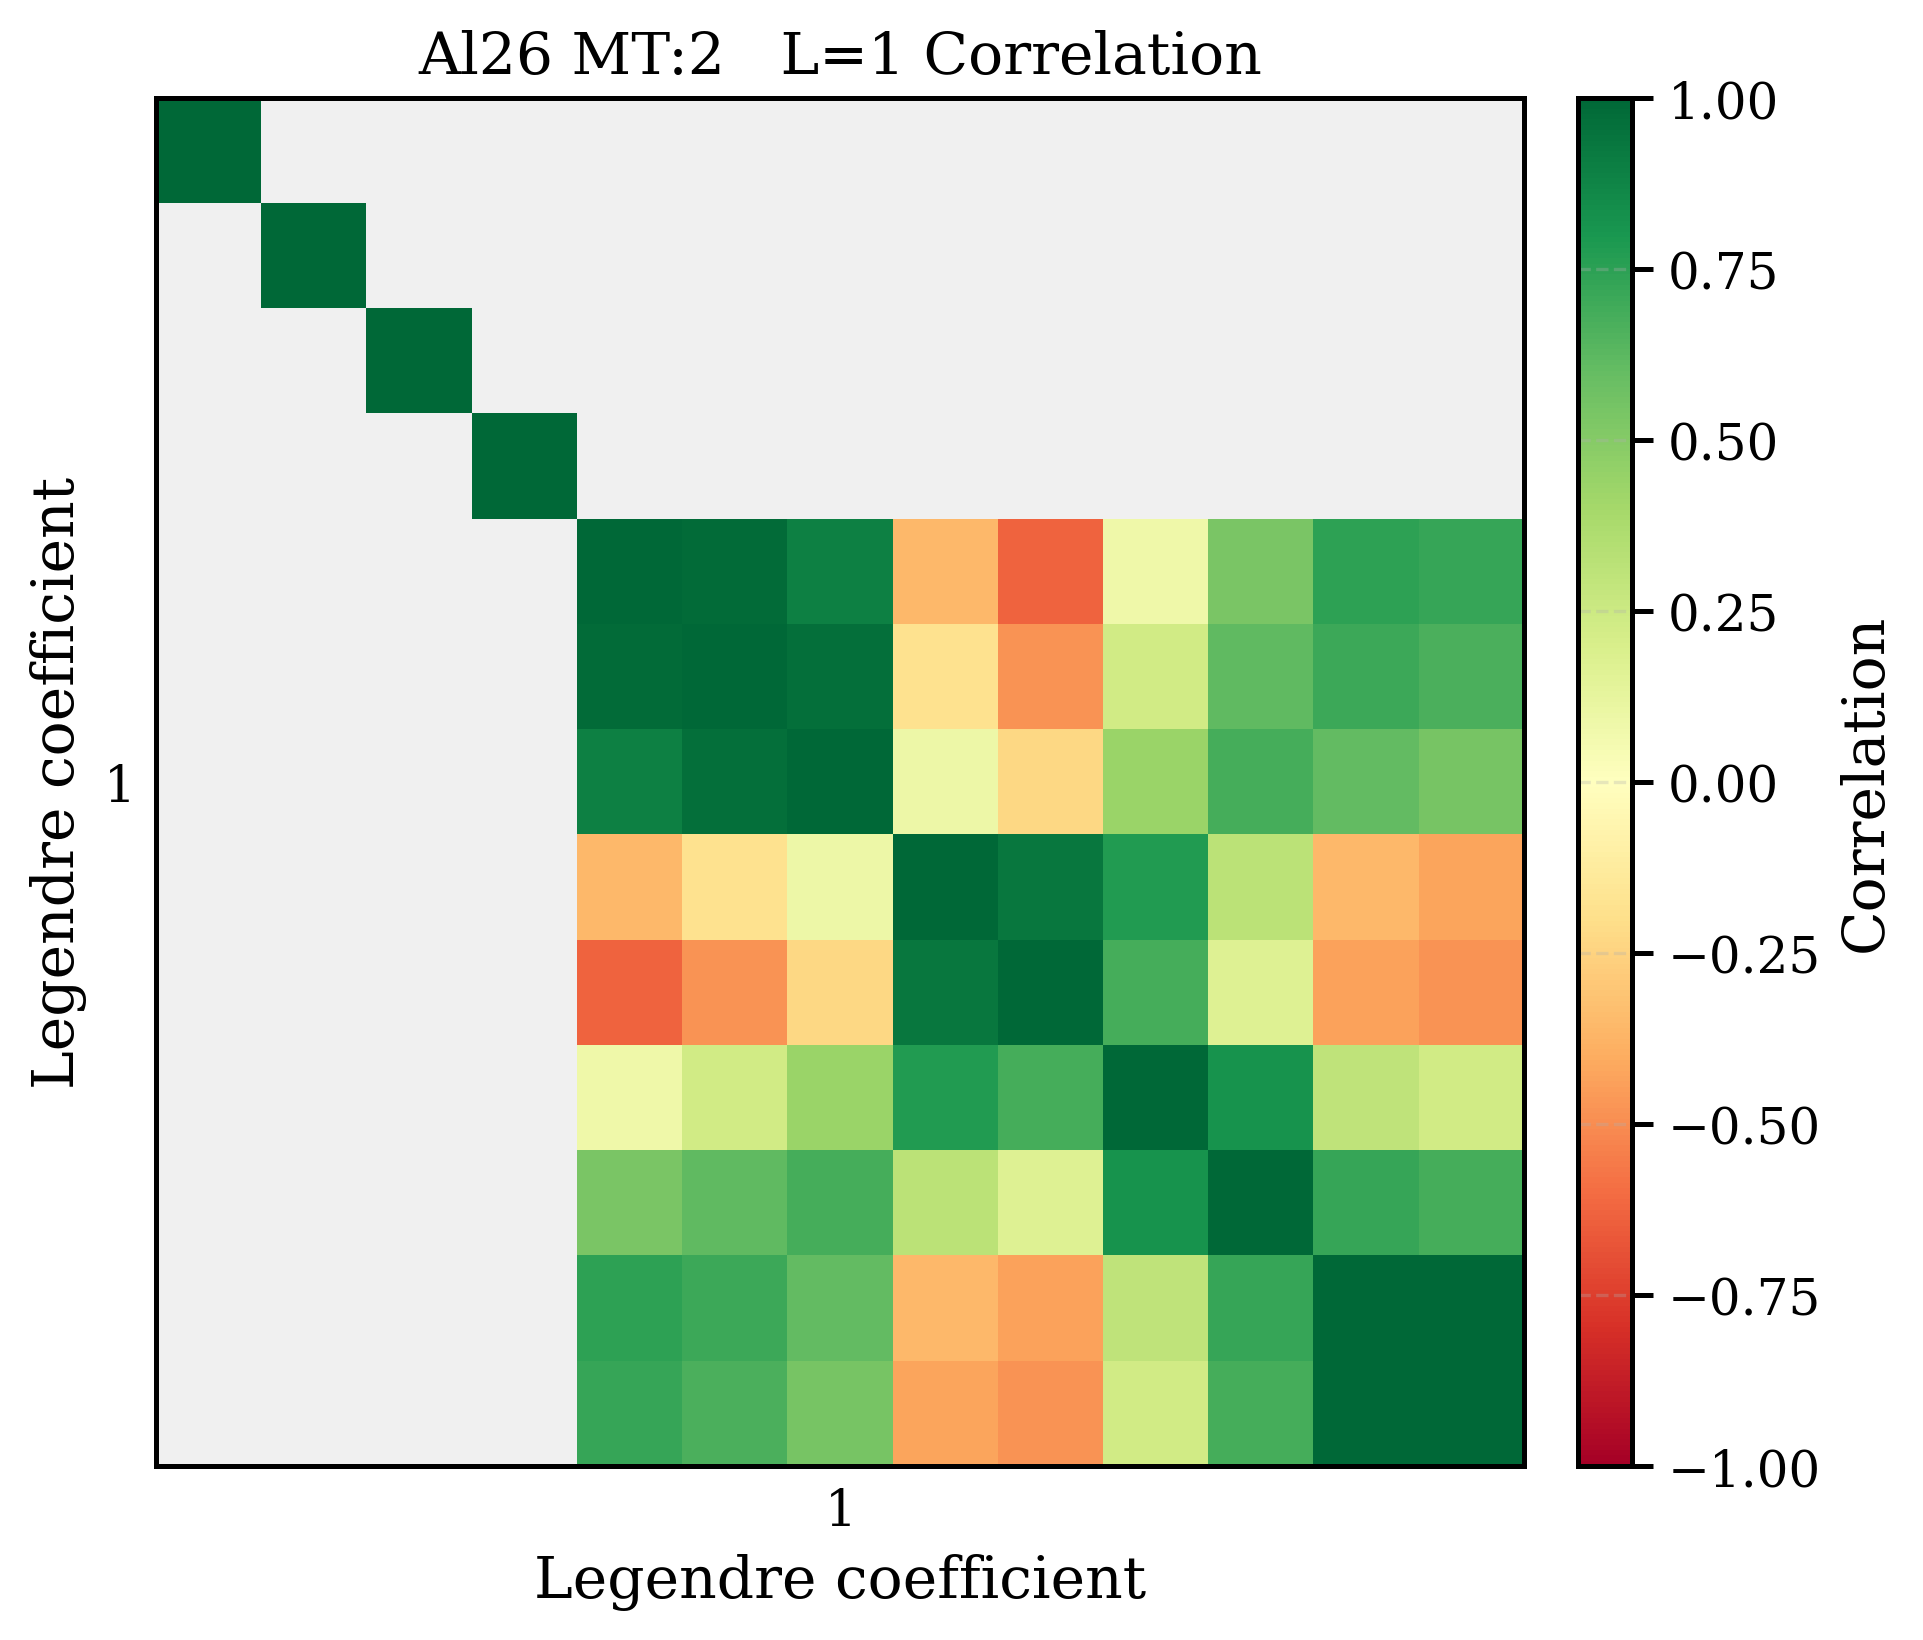

In [8]:
ang_cov.plot_covariance_heatmap(13026, 2, matrix_type='corr', legendre_coeffs=[1]);

In [9]:
jendl_Fe56 = '/share_snc/snc/JuanMonleon/n-26056_jendl.txt'
jendl_endf = read_endf(jendl_Fe56)

cov = jendl_endf.mf[34].to_ang_covmat()

/home/MONLEON-JUAN/MCNPy/mcnpy/endf/parsers/parse_endf.py:90: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 8, 33]. Only parsing: [1, 4, 34]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")


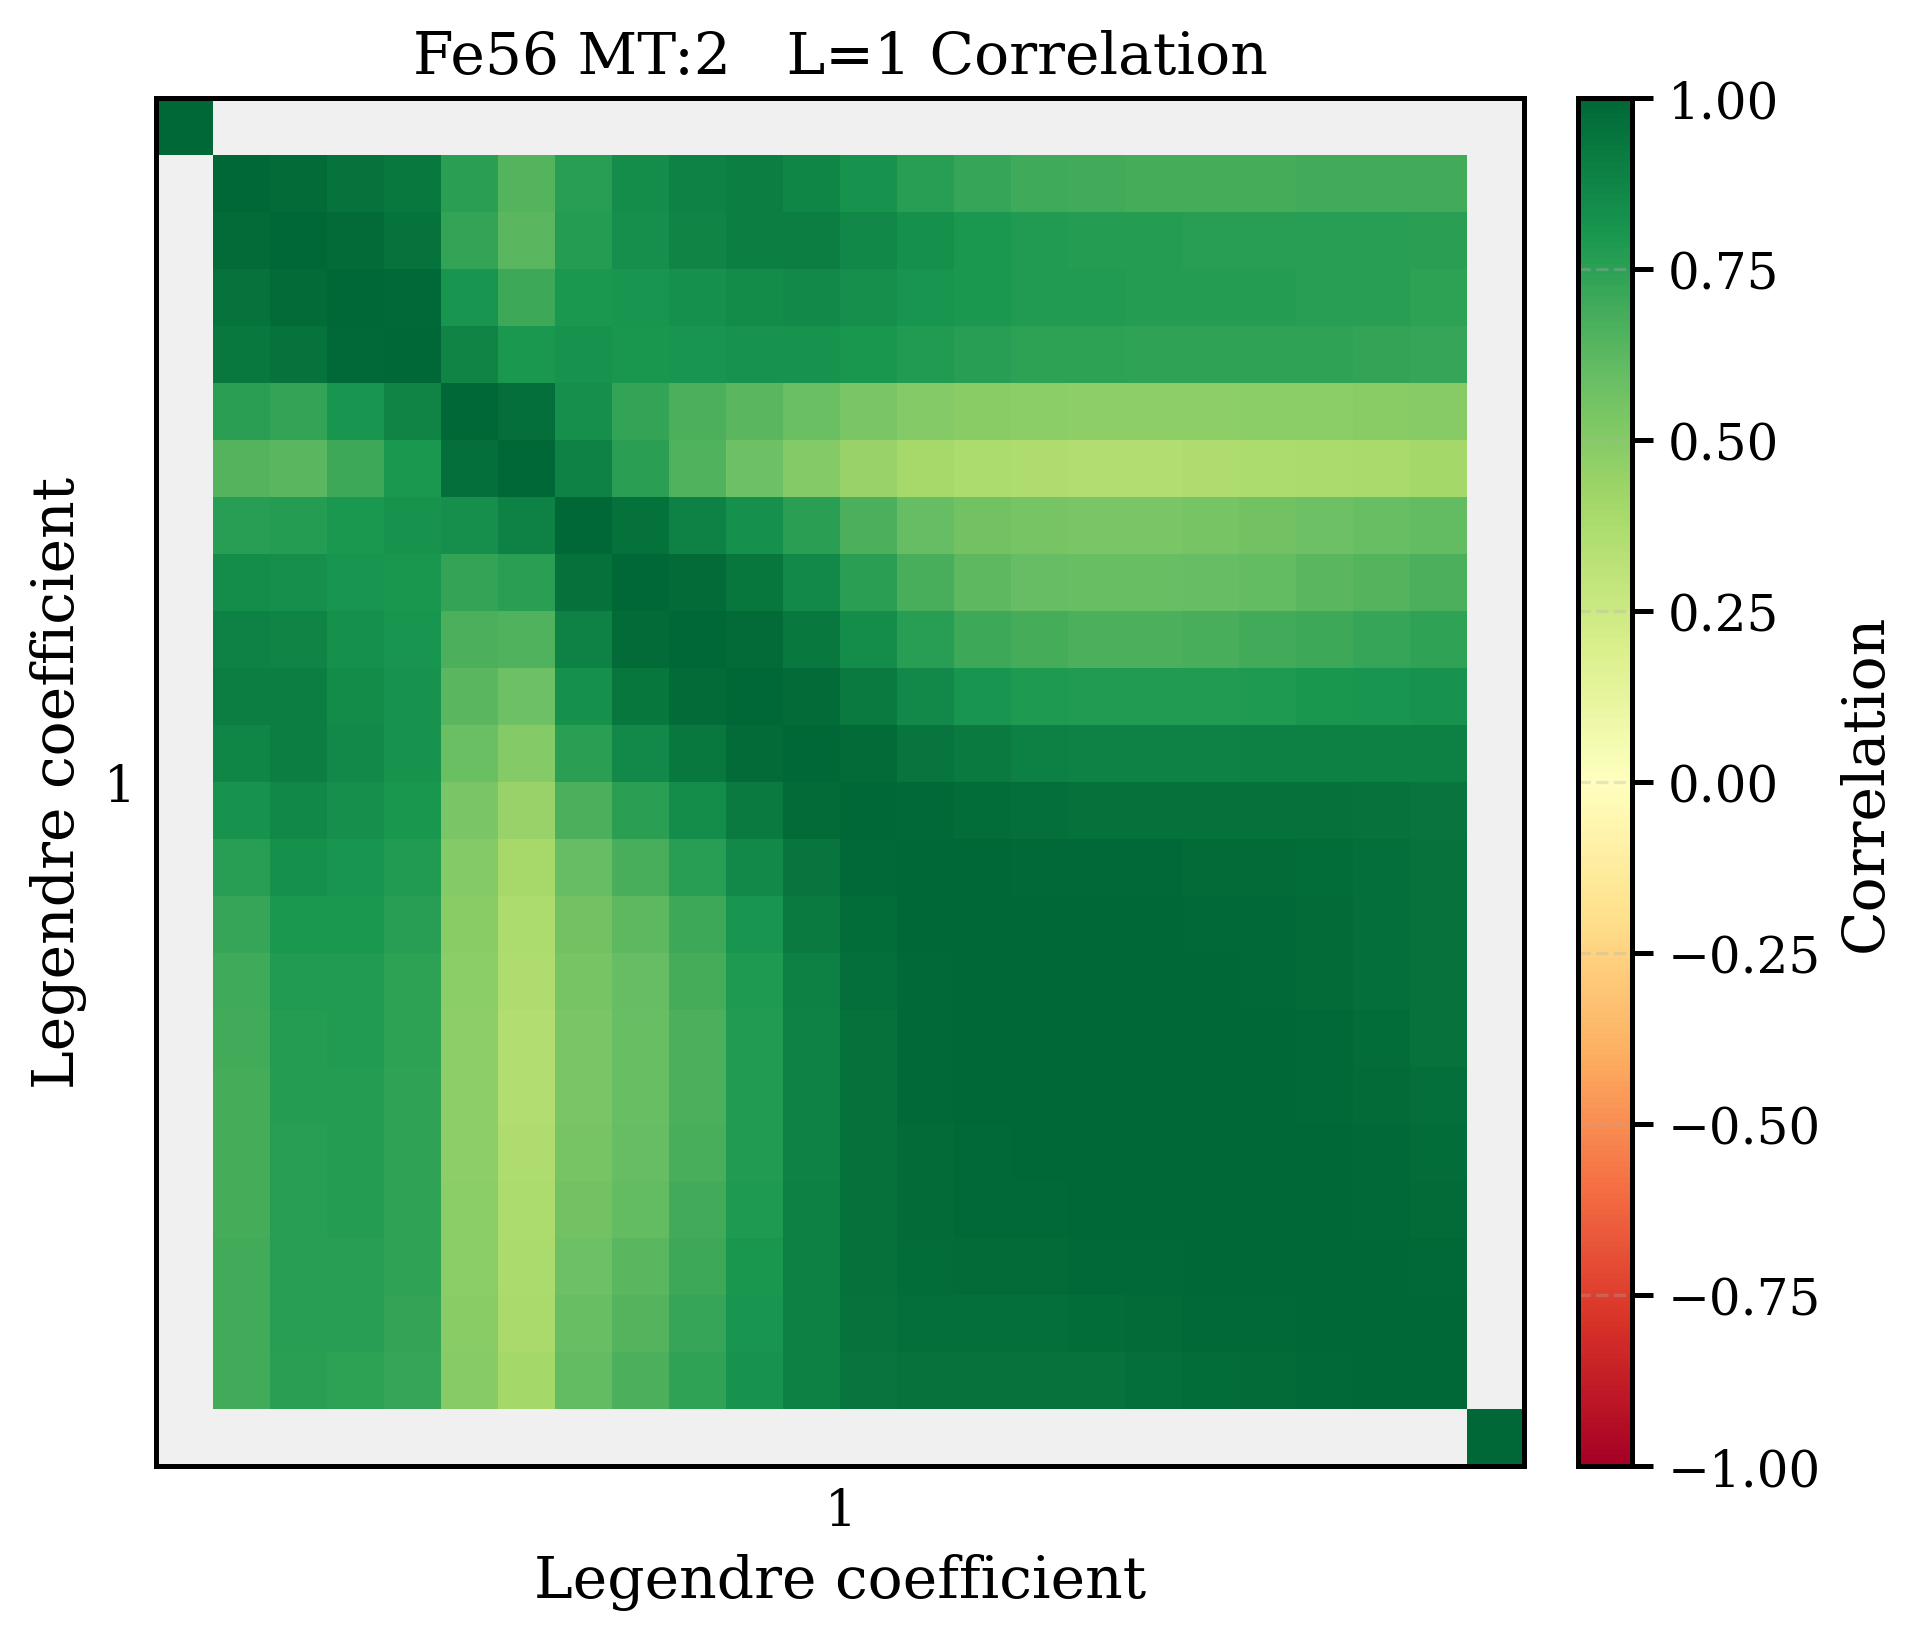

In [13]:
cov.plot_covariance_heatmap(26056, 2, matrix_type='corr', legendre_coeffs=[1]);